# Building a GAN network

Ran on Colab.

In [2]:
raise SystemExit("Stop right there!");

SystemExit: Stop right there!

In [ ]:
# Import the required library functions
from keras.models import Sequential
from numpy import hstack, zeros, ones
from numpy.random import rand, randn
from keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
# Use Keras' linear activation function for the last layer of the
# generator network because the output vector should consist of
# continuous real values as a normal distribution does.
def define_gen(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(
        Dense(
            15,
            activation="relu",
            kernel_initializer="he_uniform",
            input_dim=latent_dim,
        )
    )
    model.add(Dense(n_outputs, activation="linear"))
    return model

In [ ]:
# The discriminator network has a binary output that identifies whether
# the input is real or fake: Use sigmoid as the activation function and
# binary cross-entropy as loss
def define_disc(n_inputs=2):
    model = Sequential()
    model.add(
        Dense(
            25,
            activation="relu",
            kernel_initializer="he_uniform",
            input_dim=n_inputs,
        )
    )
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return model

In [ ]:
# Extract real samples from the dataset to inspect fake samples against
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss="binary_crossentropy", optimizer="adam")
    return model

In [ ]:
# Setting the generator model to create fake samples. Generate the
# same number of points in the latent space, passing to the generator
# and creating samples.
def generate_real(n):
    x1 = rand(n) - 0.5
    x2 = x1 * x1
    x1 = x1.reshape(n, 1)
    x2 = x2.reshape(n, 1)
    x = hstack((x1, x2))
    y = ones((n, 1))
    return x, y

In [ ]:
# Define the arguments like batch size,input feature size and output
# feature size
def gen_latent_points(latent_dim, n):
    x_input = randn(latent_dim * n)
    x_input = x_input.reshape(n, latent_dim)
    return x_input

In [ ]:
# Using the generator to generate fake samples with class labels
def gen_fake(generator, latent_dim, n):
    x_input = gen_latent_points(latent_dim, n)
    x = generator.predict(x_input)
    y = zeros((n, 1))
    return x, y

In [ ]:
# Evaluating the discriminator model
def performance_summary(epoch, generator, discriminator, latent_dim, n=100):
    x_real, y_real = generate_real(n)
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    x_fake, y_fake = gen_fake(generator, latent_dim, n)
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    print(epoch, acc_real, acc_fake)
    plt.scatter(x_real[:, 0], x_real[:, 1], color="green")
    plt.scatter(x_fake[:, 0], x_fake[:, 1], color="red")
    plt.show()

In [ ]:
# Training the model
def train(
    g_model,
    d_model,
    gan_model,
    latent_dim,
    n_epochs=2000,
    n_batch=128,
    n_eval=100,
):
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        x_real, y_real = generate_real(half_batch)
        x_fake, y_fake = gen_fake(g_model, latent_dim, half_batch)
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        x_gan = gen_latent_points(latent_dim, n_batch)
        y_gan = ones((n_batch, 1))
        gan_model.train_on_batch(x_gan, y_gan)
        if (i + 1) % n_eval == 0:
            performance_summary(i, g_model, d_model, latent_dim)

99 0.6600000262260437 0.15000000596046448


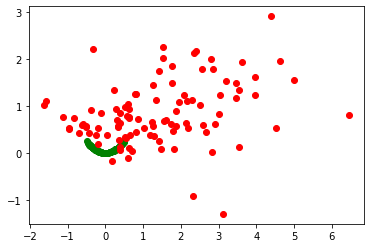

199 0.7200000286102295 0.8700000047683716


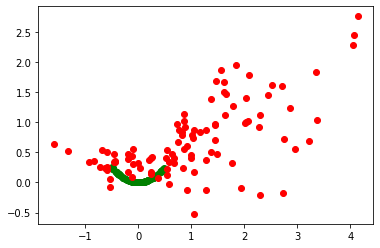

299 0.7799999713897705 0.6200000047683716


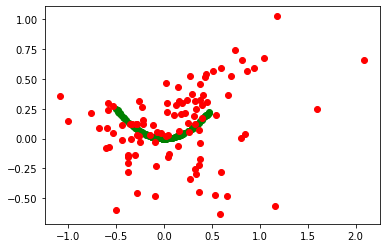

399 0.8100000023841858 0.4300000071525574


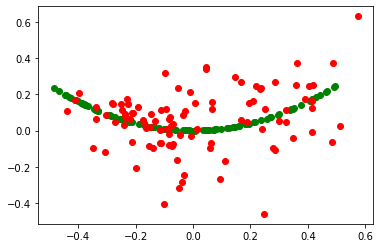

499 0.7400000095367432 0.3700000047683716


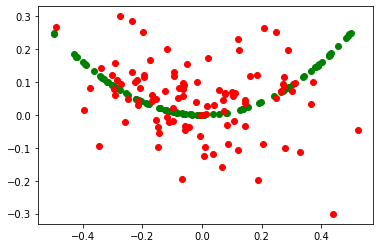

599 0.800000011920929 0.3100000023841858


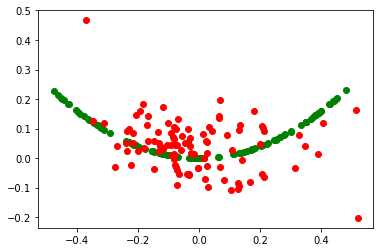

699 0.9100000262260437 0.49000000953674316


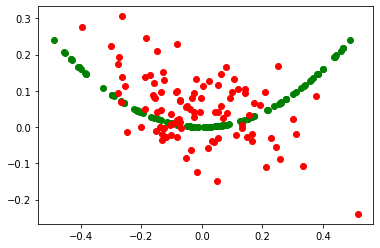

799 0.8199999928474426 0.6200000047683716


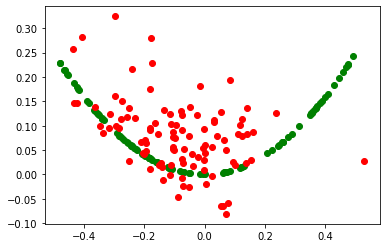

899 0.7699999809265137 0.5899999737739563


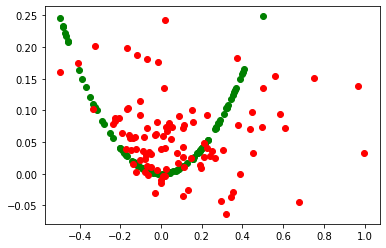

999 0.7099999785423279 0.5799999833106995


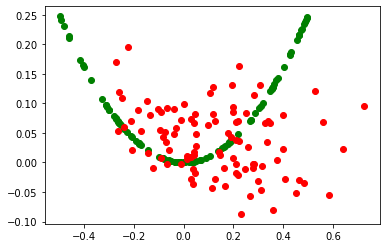

1099 0.6499999761581421 0.5899999737739563


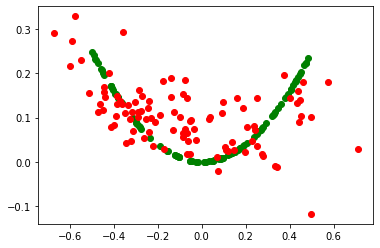

1199 0.6499999761581421 0.6600000262260437


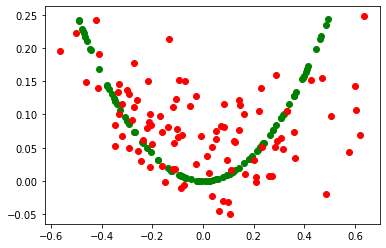

1299 0.6299999952316284 0.5699999928474426


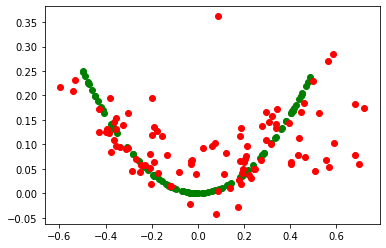

1399 0.7699999809265137 0.6700000166893005


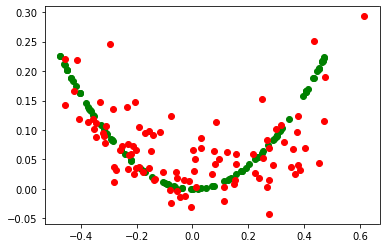

1499 0.6899999976158142 0.699999988079071


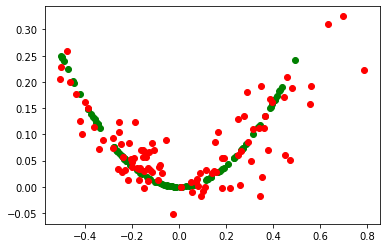

1599 0.6399999856948853 0.6899999976158142


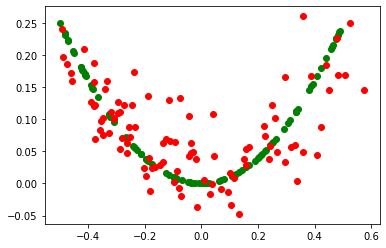

1699 0.6600000262260437 0.6200000047683716


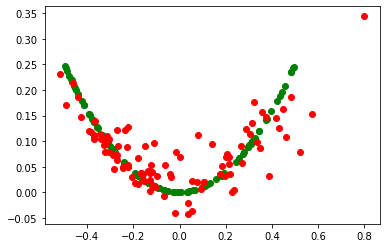

1799 0.5299999713897705 0.6800000071525574


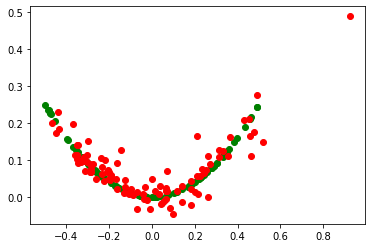

1899 0.41999998688697815 0.6200000047683716


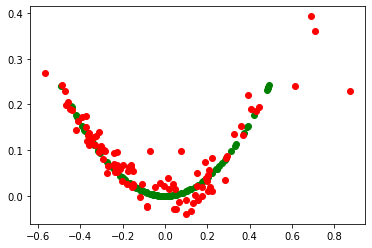

1999 0.3700000047683716 0.7799999713897705


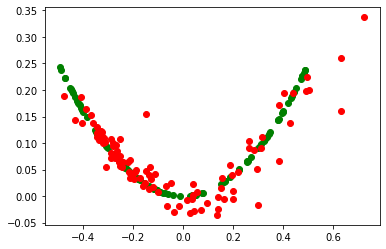

In [ ]:
dim_latent = 5
gen = define_gen(dim_latent)
disc = define_disc()
model_gan = define_gan(gen, disc)
train(gen, disc, model_gan, dim_latent)